### Global Average Temperature Analysis Project (1742-2013)
>The data analysis project on global average temperatures from 1743-2013 utilizes advanced data processing and analysis \
techniques to understand climate changes over the years. The data was sourced from a publicly available dataset on the Kaggle platform.

**Project Goals**:
- Understanding Temperature Trends: Analyze long-term trends in global temperature changes.
- Identifying Anomalies: Detect years that deviate from overall trends, indicating potential extreme climatic events.
- Regional Comparisons: Compare temperature changes across different regions of the world.
- Climate Change Conclusions: Draw conclusions about global warming and its impact on Earth's climate.

**Techniques and Tools Used:**
- Python: Programming language used for data processing and analysis.
- Python Libraries: Utilization of pandas for data manipulation, Matplotlib, and Seaborn for visualization.
- Statistical Analysis: Applying statistical methods for data analysis to interpret the results.

**Project Outcomes:**
- Temperature Trends: Demonstration of how average temperatures have changed over the years.
- Climate Anomalies: Identification of years that were particularly warm or cold in the context of long-term trends.
- Regional Differences: Presentation of how temperature changes vary between different regions of the world.
- Assessment of Climate Change Impact: Discussion on observed changes, their potential causes, and effects.

#### 1. Libraries & Data Ingestion

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
file_path = "data\GlobalLandTemperaturesByMajorCity.csv"

In [48]:
df = pd.read_csv(file_path)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


#### 2. Data Preprocessing

##### 2.1 Null Values - Identification

In [49]:
# how many null values?
df_null_counts = df.isnull().sum()
df_null_counts

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [50]:
# what is percentage of null values?
pct_null_counts = df_null_counts / len(df) * 100
pct_null_counts

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [51]:
# which country has most empty values?
country_null_counts = df.groupby("Country").apply(lambda x: x.isnull().sum())
sorted_country_null_counts = country_null_counts.sort_values(by='AverageTemperatureUncertainty', ascending=False)
sorted_country_null_counts

C:\Users\Filip Copija\AppData\Local\Temp\ipykernel_6224\4038228964.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_null_counts = df.groupby("Country").apply(lambda x: x.isnull().sum())


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Country,,,,,,,
India,0,1955,1955,0,0,0,0
Pakistan,0,865,865,0,0,0,0
Brazil,0,791,791,0,0,0,0
Indonesia,0,772,772,0,0,0,0
Nigeria,0,563,563,0,0,0,0
Colombia,0,539,539,0,0,0,0
China,0,492,492,0,0,0,0
Tanzania,0,379,379,0,0,0,0
Kenya,0,287,287,0,0,0,0


In [52]:
# what are these dates? 
india_null_data = df[df['Country'] == 'India'][df.isnull().any(axis=1)]
unique_missing_india_dates = pd.to_datetime(india_null_data['dt']).dt.to_period('M')
count_empty_values_per_month = india_null_data.groupby(unique_missing_india_dates)['dt'].count()
count_empty_values_per_month
# max_missing_month = count_empty_values_per_month.idxmax()
# max_missing_month
# max_missing_value = count_empty_values_per_month.max()
# max_missing_value

C:\Users\Filip Copija\AppData\Local\Temp\ipykernel_6224\1705976750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  india_null_data = df[df['Country'] == 'India'][df.isnull().any(axis=1)]


dt
1797-01    14
1797-02    14
1798-04    14
1798-05    14
1801-04    14
           ..
1869-10     3
1869-11     3
1869-12     3
1874-05     3
2013-09    14
Freq: M, Name: dt, Length: 219, dtype: int64

In [53]:
# what does these dates mean? 
unique_india_missing_years = pd.to_datetime(india_null_data['dt']).dt.year.unique()
unique_india_missing_years

array([1797, 1798, 1801, 1807, 1808, 1809, 1810, 1811, 1812, 1814, 1832,
       1855, 1856, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1867,
       1868, 2013, 1866, 1869, 1874])

In [54]:
# years list
unique_years = pd.to_datetime(df['dt']).dt.year.unique()
unique_years.sort()
unique_years

array([1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753,
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764,
       1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775,
       1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
       1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
       1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830,
       1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1888, 1889, 1890, 1891, 1892, 18

In [55]:
# WNIOSKI 

# Przeanalizowałem Indie z racji, że posiadają najwięcej pustych wartości dla temperatury, a ich wartość przewyższa ponad dwukrotnie 
# dane w porównaniu do innych krajów, tym samym osiągając wynik ~ 18% w stosunku do total brakujących rekordów. Maksymalnie w danym miesiącu 
# występowało 14 pustych wartości. Puste wartości występują w sposób prawdopodobnie losowy lub trudny do zidentyfikowania. Nie występuje
# zauważalny schemat. Z racji, że puste wartości stanowią zaledwie niecałe 5% na tle całego zestawu danych oraz ich wybiórczość - można uznać
# że usunięcie ich nie będzie miało istotnych rezultatów w dalszej analizie 

##### 2.2 Null Values - Clearing

In [56]:
df = df.dropna()
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


##### 2.3 Data Types & Column Names

In [57]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [58]:
columns = ['Date', 'AvgTemp', 'AvgTempUnc', 'City', 'Country', 'Latitude', 'Longitude']
df.columns = columns
df

,Date,AvgTemp,AvgTempUnc,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [59]:
df = df.astype({'Date': 'datetime64[ns]', 'AvgTemp': 'float64', 'AvgTempUnc': 'float64', 'City': 'string', 'Country': 'string', 'Latitude': 'string', 'Longitude': 'string'})
df.dtypes

Date          datetime64[ns]
AvgTemp              float64
AvgTempUnc           float64
City          string[python]
Country       string[python]
Latitude      string[python]
Longitude     string[python]
dtype: object

In [60]:
# Extract directions
df['Latitude_deg'] = df['Latitude'].str[:-1].astype(float)
df['Latitude_dir'] = df['Latitude'].str[-1]

df['Longitude_deg'] = df['Longitude'].str[:-1].astype(float)
df['Longitude_dir'] = df['Longitude'].str[-1]

df.dtypes

Date             datetime64[ns]
AvgTemp                 float64
AvgTempUnc              float64
City             string[python]
Country          string[python]
Latitude         string[python]
Longitude        string[python]
Latitude_deg            float64
Latitude_dir     string[python]
Longitude_deg           float64
Longitude_dir    string[python]
dtype: object

##### 2.4 AvgTempUnc - Analyse

In [61]:
df_stats = df['AvgTempUnc'].describe()
df_stats 

count    228175.000000
mean          0.969343
std           0.979644
min           0.040000
25%           0.340000
50%           0.592000
75%           1.320000
max          14.037000
Name: AvgTempUnc, dtype: float64

Text(0.5, 1.0, 'Boxplot of AvgTempUnc')

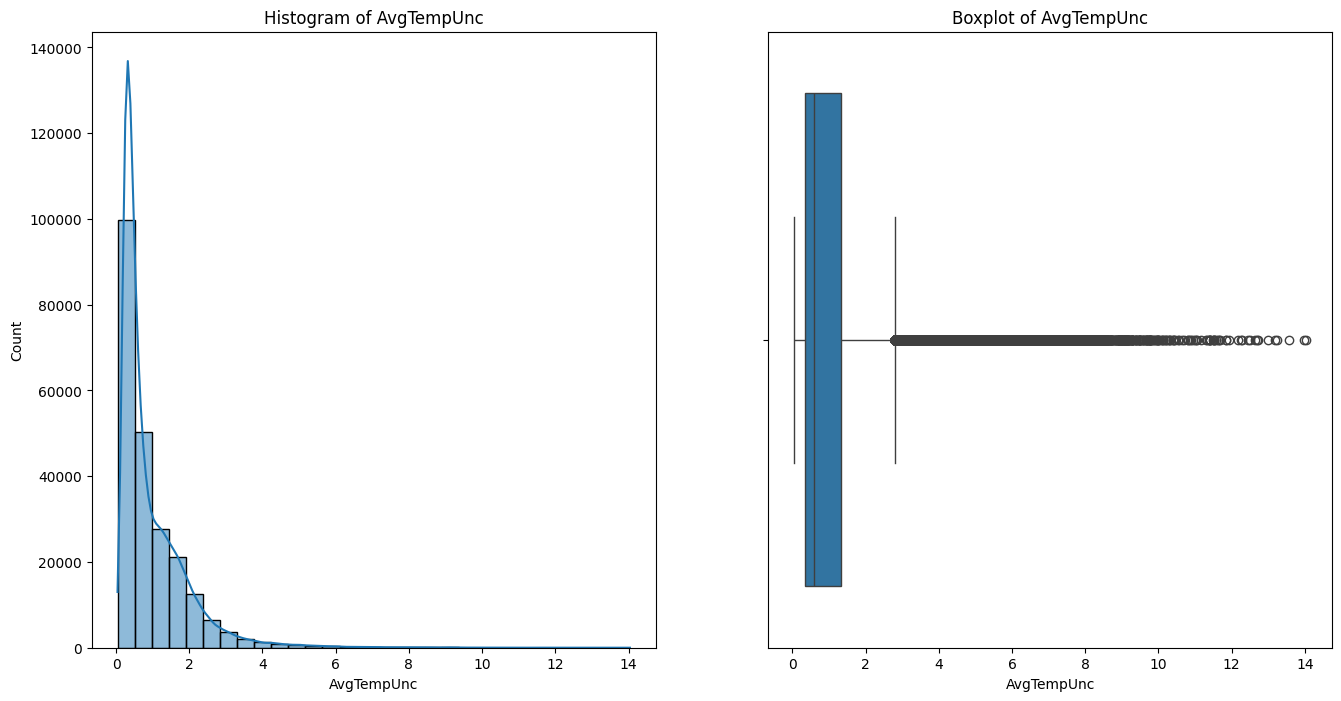

In [62]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(df['AvgTempUnc'], bins=30, kde=True)
plt.title('Histogram of AvgTempUnc')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['AvgTempUnc'])
plt.title('Boxplot of AvgTempUnc')

In [63]:
# WNIOSKI

# Histogram jest asymetryczny prawostronnie, znaczna liczba obserwacji znajduje się w przedziale od 1-2. Daje nam to akceptowalną 
# niepewność pomiarową dla dalszej analizy. Zauważalne jest również występowanie skrajnie odstających wartości, gdzie niepewność
# pomiaru sięga ~ 14 stopni. Na tym etapie warto rozważyć wyliczenie rozstępu ćwiartkowego i filtrację danych spoza zakresu. 
# Zanim jednak to zrobimy spróbujemy przyjrzeć się anomaliom, wyznaczyć kraje, w których występują najczęściej i zbadać je pod kątem różnicy temperatur.

In [64]:
Q1 = df['AvgTempUnc'].quantile(0.25)
Q3 = df['AvgTempUnc'].quantile(0.75)
IQR = Q3 - Q1
out_min = Q1 - 1.5 * IQR
out_max = Q3 + 1.5 * IQR

print(Q1, Q3, IQR, out_min, out_max) # sugerowany przedział błędu pomiarowego 0-3

0.34 1.32 0.98 -1.13 2.79


In [65]:
outline_data = df[df['AvgTempUnc'] >= 4]
outline_data.describe()

,Date,AvgTemp,AvgTempUnc,Latitude_deg,Longitude_deg
count,3954,3954.000000,3954.000000,3954.000000,3954.00000
mean,1790-03-14 02:15:28.679818240,7.881903,5.509393,44.688862,34.15240
min,1753-01-01 00:00:00,-24.872000,4.000000,2.410000,0.00000
25%,1768-01-01 00:00:00,0.956500,4.419250,40.990000,6.70000
50%,1784-03-01 00:00:00,7.132000,5.016000,45.810000,29.19000
75%,1813-03-01 00:00:00,16.081500,6.071750,52.240000,72.68000
max,1953-01-01 00:00:00,34.641000,14.037000,60.270000,144.41000
std,NaN,10.154059,1.502547,10.285809,31.83345


In [66]:
outline_data_country = outline_data['Country'].value_counts()
outline_data_country

Country
Russia                494
Turkey                424
United Kingdom        366
Germany               365
France                358
United States         315
Canada                304
Italy                 288
India                 252
Ukraine               237
Spain                 213
Morocco                96
China                  85
Egypt                  30
Syria                  20
Bangladesh             18
Pakistan               17
Brazil                 16
Burma                  13
Thailand                7
Japan                   4
Australia               4
South Africa            4
Chile                   3
Sudan                   3
Iraq                    3
Peru                    3
Iran                    2
Saudi Arabia            2
Senegal                 2
Dominican Republic      2
Somalia                 1
Vietnam                 1
Zimbabwe                1
Taiwan                  1
Name: count, dtype: Int64

In [67]:
sorted_outline_data = outline_data[(outline_data['Country'] == 'Russia') & (outline_data['City'] == 'Moscow')].sort_values(by=['Date', 'City'])
sorted_outline_data['Date'].max()

Timestamp('1847-01-01 00:00:00')

In [68]:
sorted_outline_data_jan = outline_data[(outline_data['Country'] == 'Russia') & (outline_data['City'] == 'Moscow') & (outline_data['Date'].dt.month == 3)].sort_values(by=['Date',  'City'])
sorted_outline_data_jan

,Date,AvgTemp,AvgTempUnc,City,Country,Latitude,Longitude,Latitude_deg,Latitude_dir,Longitude_deg,Longitude_dir
155344,1756-03-01,-3.497,5.061,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155392,1760-03-01,-7.097,8.067,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155428,1763-03-01,-7.889,5.110,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155476,1767-03-01,-1.723,6.050,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155500,1769-03-01,-3.230,4.497,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155524,1771-03-01,-8.613,5.705,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155536,1772-03-01,-6.862,4.449,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155956,1807-03-01,-4.402,4.560,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
155968,1808-03-01,-8.193,4.399,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E
156028,1813-03-01,-4.687,7.132,Moscow,Russia,55.45N,36.85E,55.45,N,36.85,E


In [69]:
# WNIOSKI

# Po analizie danych ze zbioru odstającego w podziale na kraje i miasta, że wysoki błąd pomiarowy może być spowodowany
# nagłymi, drastycznymi w średniej tempraturze danego dnia lub zwyczajnie niedokładnie wykonanymi badaniami. Wysoka niepewność 
# w badanym przypadku utrzymuje się w miare regularnie w przeskokach co kilka lat, jednakże całkowicie wypada z badanego przedziału
# po latach 1847. Potraktujmy to więc jako poprawa jakości wykonywanych badań i ustalmy ostateczny próg niepewności na zakres 0 - 4.

In [70]:
filtered_df = df[(df['AvgTempUnc'] >= 0) & (df['AvgTempUnc'] <= 4)]
filtered_df 

,Date,AvgTemp,AvgTempUnc,City,Country,Latitude,Longitude,Latitude_deg,Latitude_dir,Longitude_deg,Longitude_dir
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W
...,...,...,...,...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E,34.56,N,108.97,E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,34.56,N,108.97,E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,34.56,N,108.97,E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,34.56,N,108.97,E


##### 2.5 Duplicates

In [71]:
duplicate_rows = df.duplicated().sum()
duplicate_rows #none

0

#### 3. Data Visualization

##### Average Temperature Trends Over Time for Selected Cities

In [72]:
filtered_df.dtypes

Date             datetime64[ns]
AvgTemp                 float64
AvgTempUnc              float64
City             string[python]
Country          string[python]
Latitude         string[python]
Longitude        string[python]
Latitude_deg            float64
Latitude_dir     string[python]
Longitude_deg           float64
Longitude_dir    string[python]
dtype: object

C:\Users\Filip Copija\AppData\Local\Temp\ipykernel_6224\2783785076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year


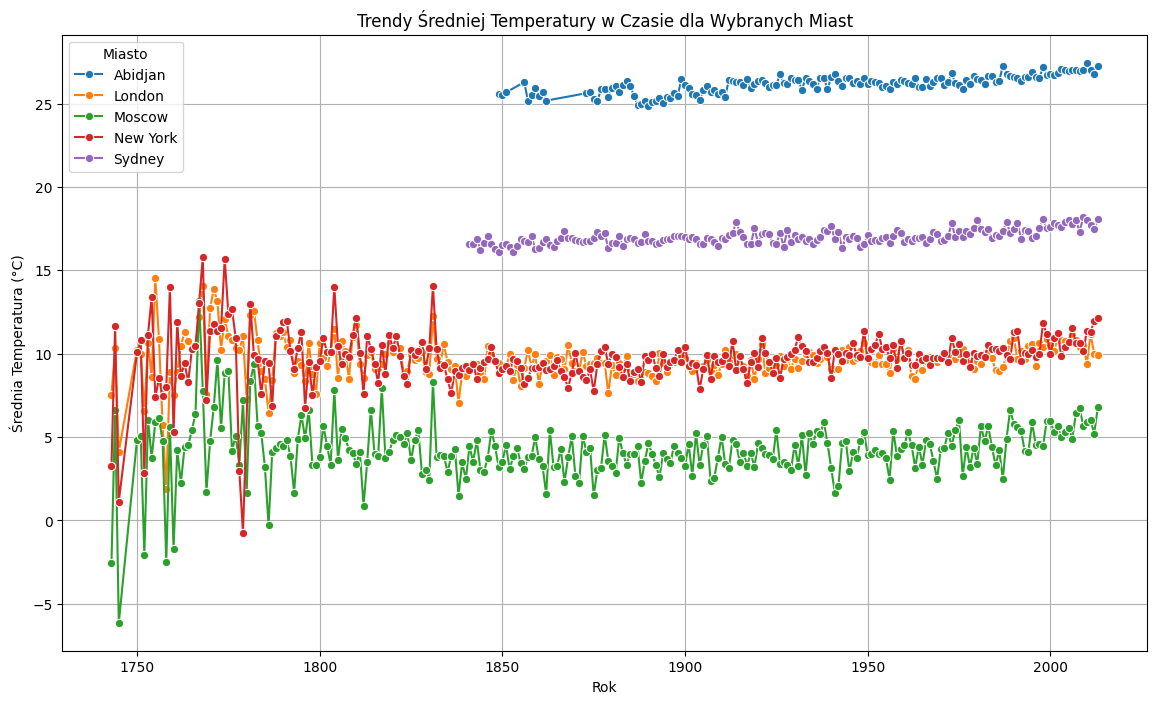

In [73]:
selected_cities = ['Moscow', 'New York', 'Sydney', 'Abidjan', 'London']
filtered_df['year'] = filtered_df['Date'].dt.year

average_temp_by_city = filtered_df[filtered_df['City'].isin(selected_cities)].groupby(['City', 'year'])['AvgTemp'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='AvgTemp', hue='City', data=average_temp_by_city, marker='o')
plt.title('Trendy Średniej Temperatury w Czasie dla Wybranych Miast')
plt.xlabel('Rok')
plt.ylabel('Średnia Temperatura (°C)')
plt.legend(title='Miasto')
plt.grid(True)
plt.show()

###### Random

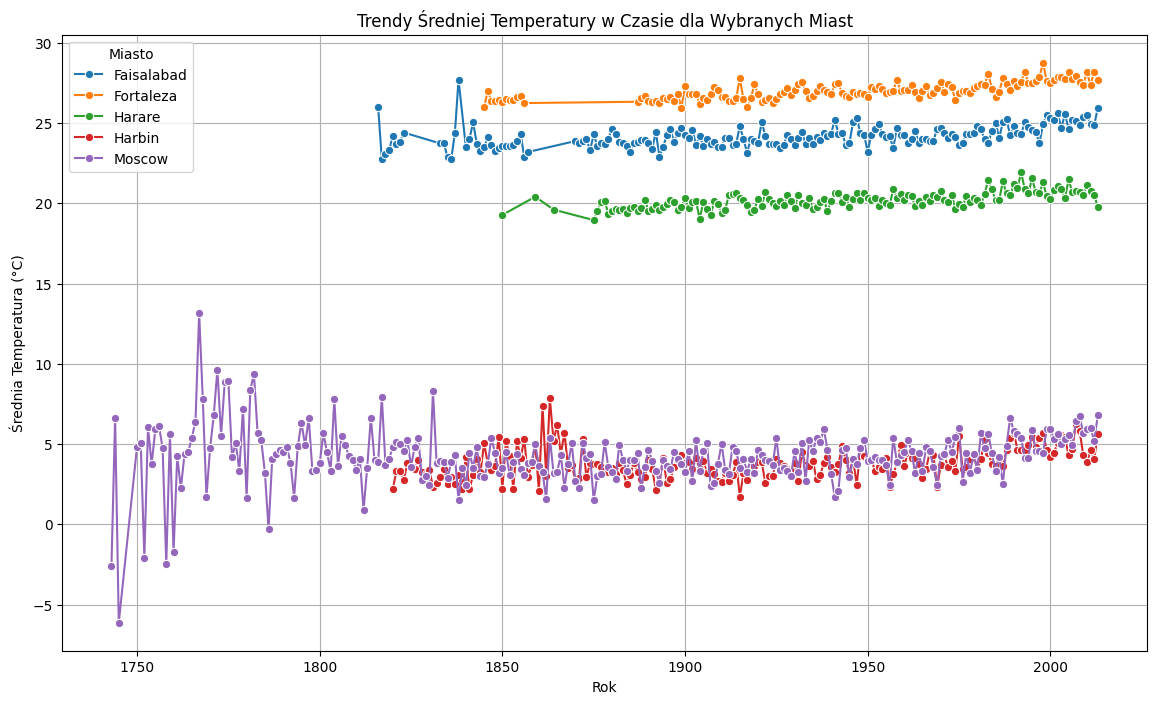

In [85]:
unique_cities = filtered_df['City'].unique()
selected_random_cities = np.random.choice(unique_cities, 5, replace=False)

average_temp_by_city_random = filtered_df[filtered_df['City'].isin(selected_random_cities)].groupby(['City', 'year'])['AvgTemp'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='AvgTemp', hue='City', data=average_temp_by_city_random, marker='o')
plt.title('Trendy Średniej Temperatury w Czasie dla Wybranych Miast')
plt.xlabel('Rok')
plt.ylabel('Średnia Temperatura (°C)')
plt.legend(title='Miasto')
plt.grid(True)
plt.show()

##### Comparison of Average Temperatures for Selected Cities

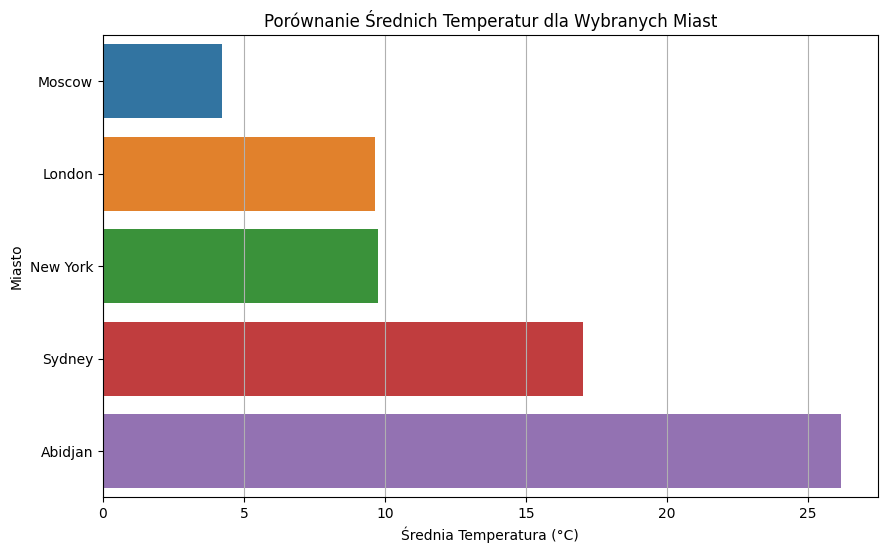

In [75]:
average_temp_overall = average_temp_by_city.groupby('City')['AvgTemp'].mean().reset_index()

average_temp_overall = average_temp_overall.sort_values(by='AvgTemp')

plt.figure(figsize=(10, 6))
sns.barplot(x='AvgTemp', y='City', hue='City', data=average_temp_overall, legend=False)
# sns.barplot(x='AverageTemperature', y='City', data=average_temp_overall, palette='coolwarm')
plt.title('Porównanie Średnich Temperatur dla Wybranych Miast')
plt.xlabel('Średnia Temperatura (°C)')
plt.ylabel('Miasto')
plt.grid(axis='x')
plt.show()

###### Random 

C:\Users\Filip Copija\AppData\Local\Temp\ipykernel_6224\3813508123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AvgTemp', y='City', data=average_temp_recent_random, palette='coolwarm')


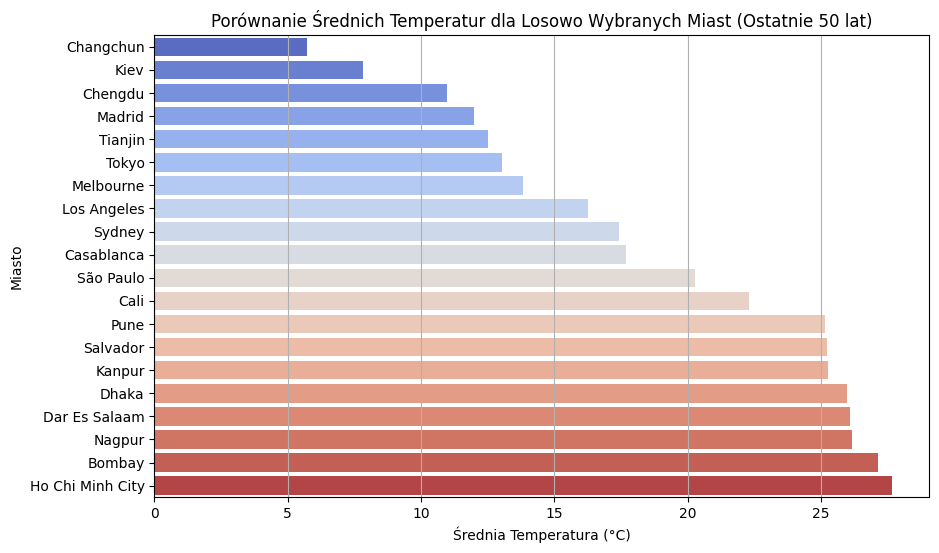

In [86]:
recent_years = filtered_df['year'].max() - 50
filtered_df_recent_years = filtered_df[filtered_df['year'] > recent_years]

selected_random_cities = np.random.choice(unique_cities, 20, replace=False)

filtered_data_random_cities = filtered_df_recent_years[filtered_df_recent_years['City'].isin(selected_random_cities)]

average_temp_recent_random = filtered_data_random_cities.groupby('City')['AvgTemp'].mean().reset_index()
average_temp_recent_random = average_temp_recent_random.sort_values(by='AvgTemp')

plt.figure(figsize=(10, 6))
sns.barplot(x='AvgTemp', y='City', data=average_temp_recent_random, palette='coolwarm')
plt.title('Porównanie Średnich Temperatur dla Losowo Wybranych Miast (Ostatnie 50 lat)')
plt.xlabel('Średnia Temperatura (°C)')
plt.ylabel('Miasto')
plt.grid(axis='x')
plt.show()

##### Distribution of Average Temperatures

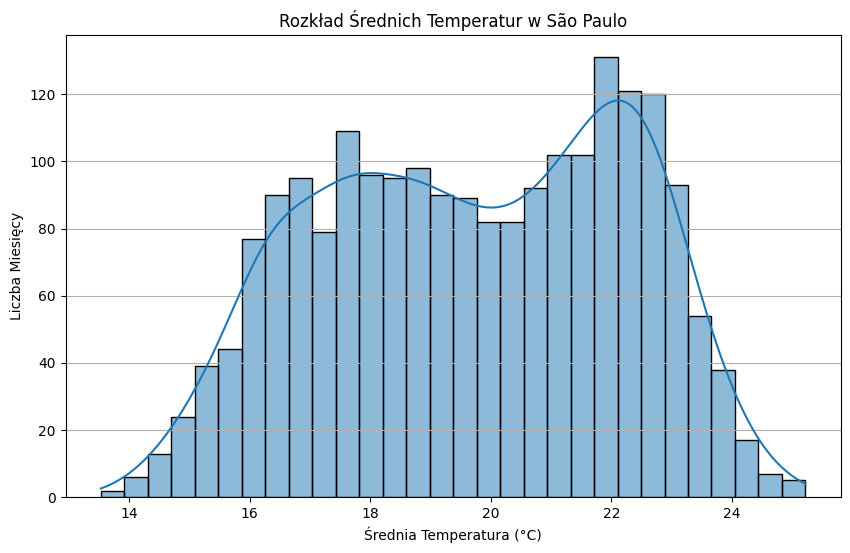

In [87]:
selected_random_city = np.random.choice(unique_cities, 1, replace=False)[0]  
data_sydney = filtered_df[filtered_df['City'] == selected_random_city]

plt.figure(figsize=(10, 6))
sns.histplot(data_sydney['AvgTemp'], bins=30, kde=True)
plt.title(f'Rozkład Średnich Temperatur w {selected_random_city}')
plt.xlabel('Średnia Temperatura (°C)')
plt.ylabel('Liczba Miesięcy')
plt.grid(axis='y')
plt.show()

##### Heat Map of Average Temperatures Worldwide

In [78]:
filtered_df

,Date,AvgTemp,AvgTempUnc,City,Country,Latitude,Longitude,Latitude_deg,Latitude_dir,Longitude_deg,Longitude_dir,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,5.63,N,3.23,W,1849
...,...,...,...,...,...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E,34.56,N,108.97,E,2013
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,34.56,N,108.97,E,2013
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,34.56,N,108.97,E,2013
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,34.56,N,108.97,E,2013


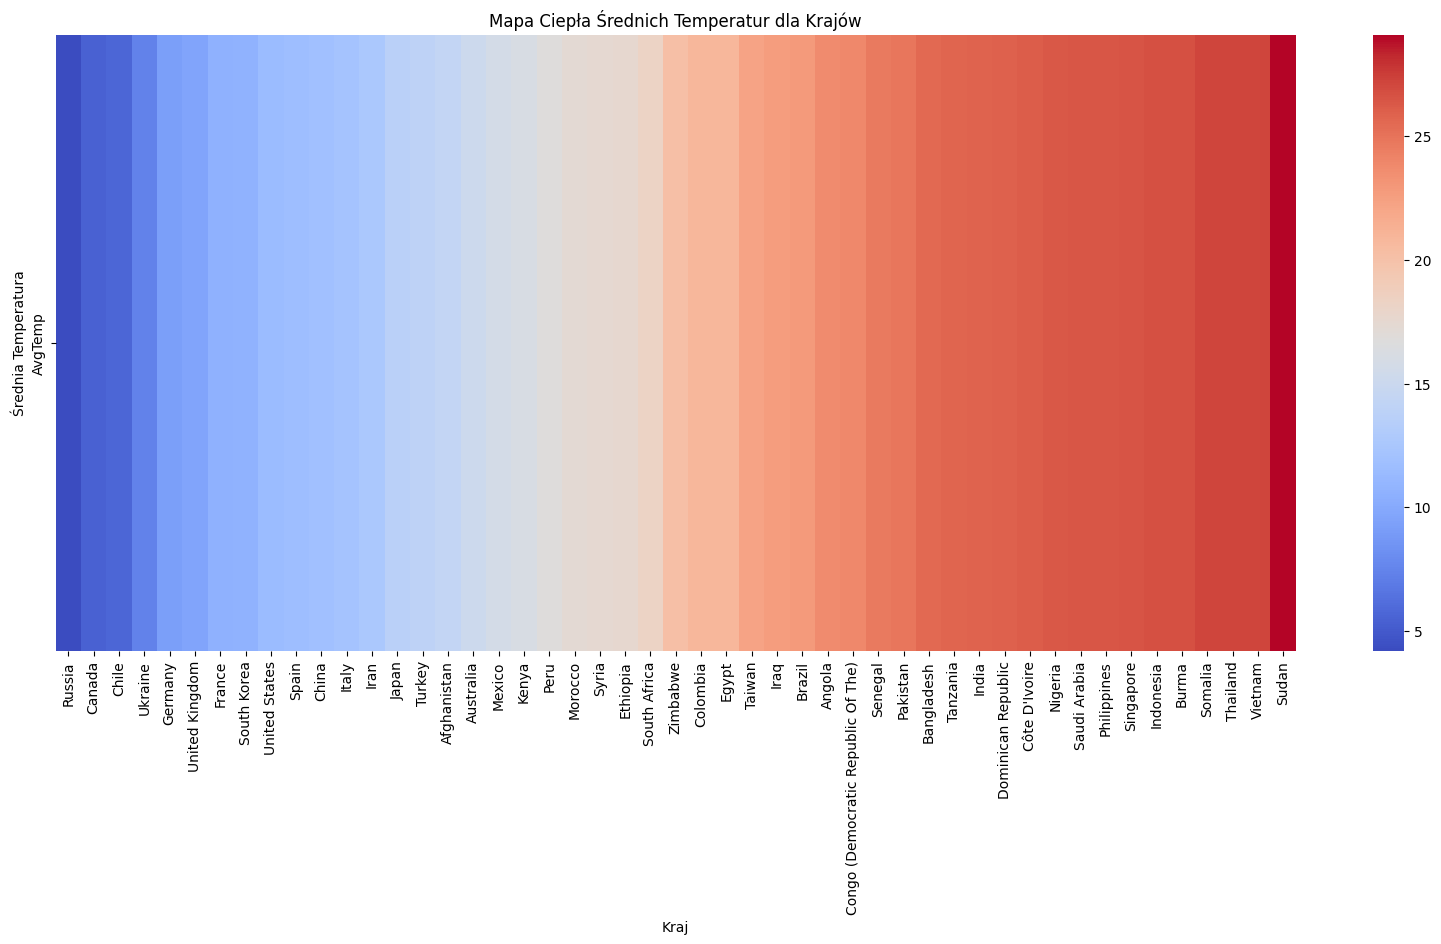

In [79]:
avg_temp_by_country = filtered_df.groupby('Country')['AvgTemp'].mean().sort_values()

plt.figure(figsize=(20, 8))
sns.heatmap(pd.DataFrame(avg_temp_by_country).T, cmap='coolwarm')
plt.title('Mapa Ciepła Średnich Temperatur dla Krajów')
plt.xlabel('Kraj')
plt.ylabel('Średnia Temperatura')
# plt.xticks(rotation=90) 
plt.show()

#### 4. Statistics

In [80]:
# średnia temperatura światowa za ostatnie 50 lat 
latest_year = filtered_df['Date'].max().year
data_filtered_last_50_years = filtered_df[filtered_df['Date'].dt.year > (latest_year - 50)]
global_average_temp_last_50_years = data_filtered_last_50_years['AvgTemp'].mean()
global_average_temp_last_50_years 

19.297258744778297

In [88]:
# Kraj z najwyższą i najniższą średnią roczną temperaturą
avg_temp_by_country = filtered_df.groupby('Country')['AvgTemp'].mean()

country_highest_avg_temp = avg_temp_by_country.idxmax()
highest_avg_temp = avg_temp_by_country.max()

country_lowest_avg_temp = avg_temp_by_country.idxmin()
lowest_avg_temp = avg_temp_by_country.min()

print(f'Kraj z najwyższą średnią roczną temperaturą: {country_highest_avg_temp}, {highest_avg_temp}°C')
print(f'Kraj z najniższą średnią roczną temperaturą: {country_lowest_avg_temp}, {lowest_avg_temp}°C')

Kraj z najwyższą średnią roczną temperaturą: Sudan, 29.08838696883853°C
Kraj z najniższą średnią roczną temperaturą: Russia, 4.2107178828365885°C


In [82]:
# Rok z największym globalnym wzrostem temperatury
global_avg_temp_by_year = filtered_df.groupby('year')['AvgTemp'].mean()

temp_change_by_year = global_avg_temp_by_year.diff()

year_with_greatest_increase = temp_change_by_year.idxmax()
greatest_increase = temp_change_by_year.max()

year_with_greatest_increase, greatest_increase

(1750, 8.760863636363636)

In [83]:
# Odchylenie standardowe temperatury dla wybranych miast
selected_cities = ["New York", "Los Angeles", "London", "Moscow", "Sydney"]

data_selected_cities = filtered_df[filtered_df['City'].isin(selected_cities)]

std_temp_by_city = data_selected_cities.groupby('City')['AvgTemp'].std()

std_temp_by_city

City
London          5.096958
Los Angeles     5.445115
Moscow         10.218984
New York        9.187208
Sydney          2.193690
Name: AvgTemp, dtype: float64